In [44]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

## Load dataset

In [22]:
import re

# remove special characters
special_chars_re = r'[^\w\s]'

In [23]:
# re.sub(special_chars_re, '', "2022年8月22日贷款市场报价利率（LPR）,中国人民银行授权全国银行间同业拆借中心公布年月日贷款市场报价利率（）为")

In [24]:
folder_path = "tmp/raw_text/ce_cn"
dataframes = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
ce_cn = pd.concat(dataframes, ignore_index=True).drop('scrape_date', axis=1).drop_duplicates(subset=['identifier'])
ce_cn.dropna(inplace=True)
# ce_cn.to_csv('ce_cn_raw.csv', index=False)
ce_cn['article_time'] = pd.to_datetime(ce_cn['article_time'], format='%Y年%m月%d日 %H:%M')
ce_cn['content'] = ce_cn['content'].apply(func= lambda x: re.sub(special_chars_re, '', str(x)))
ce_cn = ce_cn.sort_values(by='article_time').reset_index(drop=True)

In [25]:
ce_cn.head()

,identifier,title,content,article_time,article_source
0,t20220615_37756408,正视疫情防控的复杂性和长期性,鉴于北京天堂超市酒吧引发聚集性疫情北京市有关部门依法对其立案调查这起聚集性疫情仍处于发展阶段...,2022-06-15 05:06:00,来源：中国经济网-《经济日报》
1,t20220615_37756422,北京对全市娱乐场所开展大检查,经济日报北京6月14日讯记者韩秉志14日举行的北京疫情防控工作新闻发布会通报为以最快速度阻断...,2022-06-15 05:08:00,来源：中国经济网-《经济日报》
2,t20220615_37756427,我国自主培养研究生成科创主力 10年间输送60多万名博士650多万名硕士,经济日报北京6月14日讯记者 李丹教育部14日召开教育这十年新闻发布会介绍研究生教育十年改革...,2022-06-15 05:11:00,来源：中国经济网-《经济日报》
3,t20220615_37756443,首批科创票落地 银行间债市创新支持“硬科技”,首批科创票据近期在银行间债市落地记者通过公开信息查询了解到其中无锡华光环保能源集团股份有限公...,2022-06-15 05:17:00,来源：中国经济网-《经济日报》
4,t20220615_37756445,一系列稳投资政策举措密集出台 各地重大项目建设热潮再起,新基建成经济复苏压舱石走进江苏省无锡市蠡园经济开发区的国家超级计算无锡中心神威太湖之光超级计...,2022-06-15 05:18:00,来源：中国经济网-《经济日报》


In [26]:
folder_path = "tmp/raw_text/mrxwlb"
dataframes = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path, encoding='utf-8')
            dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
mrxwlb = pd.concat(dataframes, ignore_index=True)

xwlb_tmp = mrxwlb[~mrxwlb['content'].str.contains('Perhaps try sear')]
xwlb_tmp['date'] = pd.to_datetime(xwlb_tmp['date'])
xwlb_tmp = xwlb_tmp.sort_values(by='date').drop_duplicates().reset_index( drop=True)
xwlb_tmp.to_csv('xwlb_raw.csv', index=False)
xwlb_tmp['content'] = xwlb_tmp['content'].apply(func= lambda x: re.sub(special_chars_re, '', str(x)))

/tmp/ipykernel_21743/3973032843.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Word count

In [27]:
import jieba
import jieba.analyse as jba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [38]:
from collections import Counter

# remove stopwords
def get_stopword_list(file):
    with open(file, 'r', encoding='utf-8') as f:    # 
        stopword_list = [word.strip('\n') for word in f.readlines()]
    return stopword_list

def clean_stopword(str, stopword_path):
    stopword_list = get_stopword_list(stopword_path)
    result = ''
    word_list = jieba.lcut(str)   # 分词后返回一个列表  jieba.cut(）   返回的是一个迭代器
    for w in word_list:
        if w not in stopword_list:
            result += w
    return result

text_data = "".join(xwlb_tmp['content'].to_list())
clean_text = clean_stopword(text_data.replace(" ", ''), 'baidu_stopwords.txt')

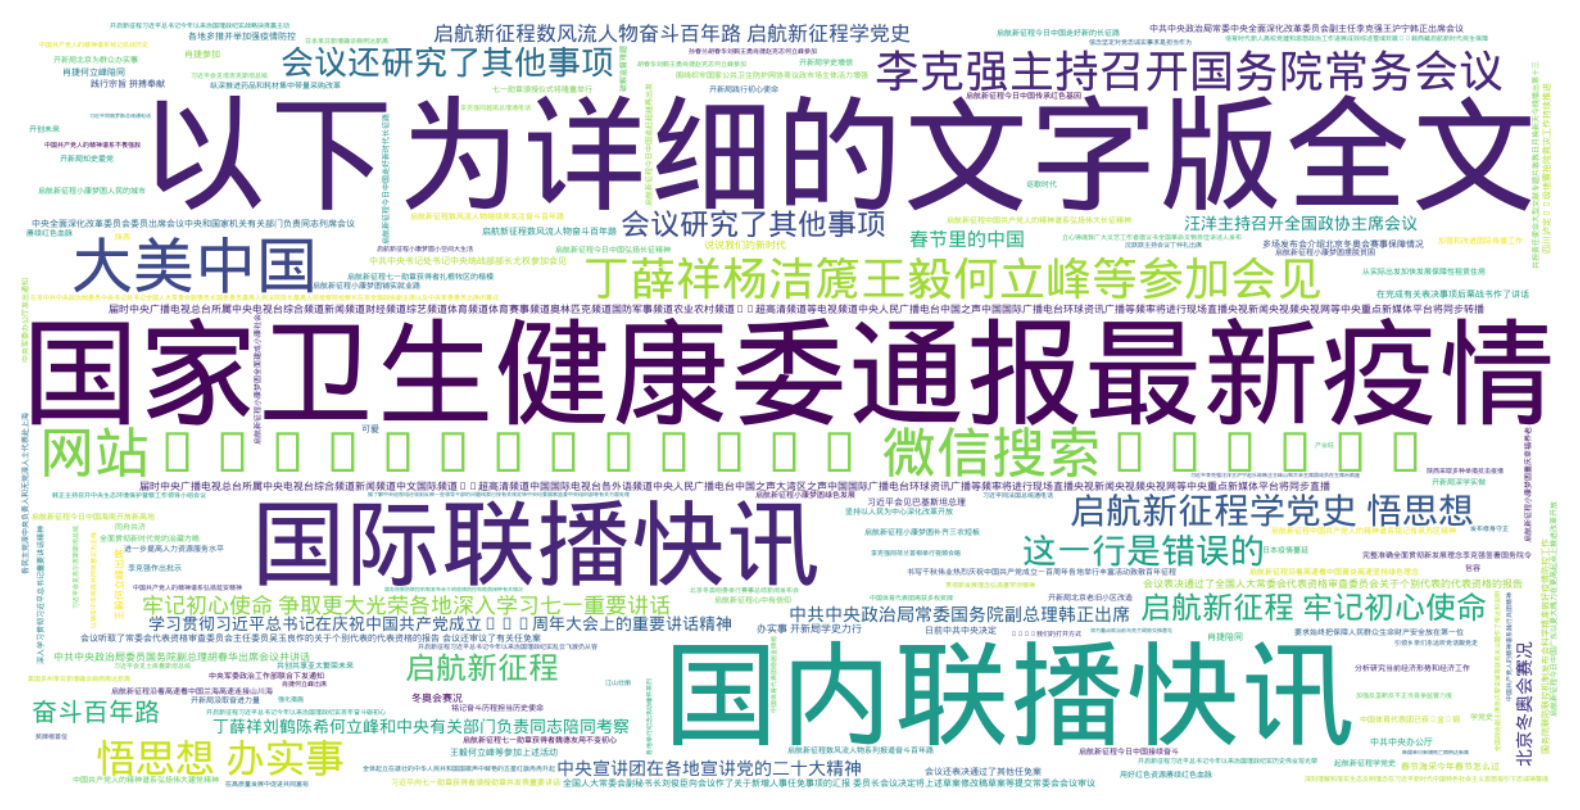

In [39]:
wordcloud = WordCloud(width=1200, height=600, background_color='white', font_path='DroidSansFallback.ttf').generate(text_data)
plt.figure(figsize=(10, 5), dpi=200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# keywords extraction demo

# text = "中共中央政治局召开会议，对下半年经济工作作出重要部署，要求经济大省要勇挑大梁，有条件的省份要力争完成经济社会发展预期目标。"

# 使用jieba的TextRank进行关键词提取
# keywords = jba.textrank(text, topK=10, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v'))

# 输出关键词
# print(keywords)

['经济', '部署', '经济社会', '完成', '预期', '目标', '发展', '要求', '作出', '省份']


In [14]:
# textrank for extracting top 20 keywords
ce_cn['keywords'] = ce_cn['content'].apply(lambda x: jba.textrank(clean_stopword(x.replace(' ', ''), 'baidu_stopwords.txt'), topK=20, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v')))

## Sentiment label

In [18]:
# import the sentiment dictionary and label the data
def load_dict(filepath):
    with open(filepath, 'r') as f:
        words = [i.strip() for i in f.readlines()]

    return words

positive_words = load_dict('pos_dict.txt')
negative_words = load_dict('neg_dict.txt')

def calc_sent_score(content):
    # 分词
    words = jieba.lcut(content)
    # print(words)

    # 初始化计数器
    positive_count = 0
    negative_count = 0

    # 遍历文章中的词汇
    for word in words:
        if word in positive_words:
            positive_count += 1
        elif word in negative_words:
            negative_count += 1

    # 计算比例
    total_emotion_words = positive_count + negative_count
    if total_emotion_words > 0:
        positive_percentage = (positive_count / total_emotion_words) * 100
    else:
        positive_percentage = 0

    return positive_percentage
ce_cn['sent_score'] = ce_cn['content'].apply(func = lambda x: calc_sent_score(x))


平均分数: 72.77805773375941
中位数分数: 79.18333333333334
最小分数: 0.0
最大分数: 100.0
标准差: 23.994802607196036
分数频次统计: Counter({100.0: 137, 33.33333333333333: 39, 50.0: 36, 25.0: 28, 75.0: 26, 0.0: 24, 66.66666666666666: 23, 85.71428571428571: 16, 60.0: 15, 83.33333333333334: 14, 20.0: 14, 22.22222222222222: 14, 62.5: 11, 87.5: 10, 90.9090909090909: 10, 91.66666666666666: 10, 30.0: 9, 80.0: 9, 76.92307692307693: 9, 71.42857142857143: 7, 61.53846153846154: 6, 73.91304347826086: 6, 97.14285714285714: 6, 88.88888888888889: 6, 42.857142857142854: 6, 64.28571428571429: 6, 93.75: 6, 69.23076923076923: 6, 92.85714285714286: 6, 28.57142857142857: 5, 92.0: 5, 88.23529411764706: 5, 40.0: 5, 37.5: 5, 91.17647058823529: 5, 63.63636363636363: 5, 86.66666666666667: 5, 72.72727272727273: 5, 76.47058823529412: 5, 96.55172413793103: 4, 77.77777777777779: 4, 68.0: 4, 68.18181818181817: 4, 95.83333333333334: 4, 94.11764705882352: 4, 55.00000000000001: 4, 92.3076923076923: 4, 90.625: 4, 81.81818181818183: 4, 78.947368421

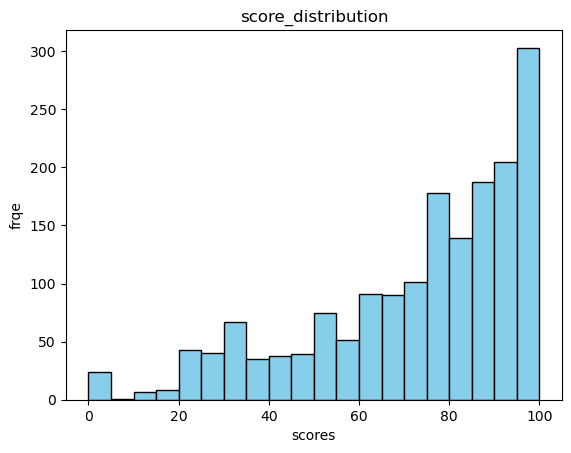

In [26]:
scores = ce_cn['sent_score']

# 使用numpy获取分数的统计信息
mean_score = np.mean(scores)  # 平均值
median_score = np.median(scores)  # 中位数
min_score = np.min(scores)  # 最小值
max_score = np.max(scores)  # 最大值
std_deviation = np.std(scores)  # 标准差

# 使用collections.Counter统计分数的频次
score_counts = Counter(scores)

# 打印统计信息
print("平均分数:", mean_score)
print("中位数分数:", median_score)
print("最小分数:", min_score)
print("最大分数:", max_score)
print("标准差:", std_deviation)
print("分数频次统计:", score_counts)

plt.hist(scores, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('scores')
plt.ylabel('frqe')
plt.title('score_distribution')
plt.show()

In [39]:
# name score with label
def assign_label(score):
    if score < 45:
        return 'neg'
    elif score <= 85:
        return 'neutral'
    else:
        return 'pos'



ce_cn['sent_label'] = ce_cn['sent_score'].apply(assign_label)

ce_cn

,identifier,title,content,article_time,article_source,keywords,sent_score,sent_label
0,t20220615_37756408,正视疫情防控的复杂性和长期性,鉴于北京天堂超市酒吧引发聚集性疫情北京市有关部门依法对其立案调查这起聚集性疫情仍处于发展阶段...,2022-06-15 05:06:00,来源：中国经济网-《经济日报》,"[疫情, 防控, 酒吧, 生活, 防疫, 风险, 天堂, 部门, 超市, 扫码, 秩序, 情...",44.680851,neg
1,t20220615_37756422,北京对全市娱乐场所开展大检查,经济日报北京6月14日讯记者韩秉志14日举行的北京疫情防控工作新闻发布会通报为以最快速度阻断...,2022-06-15 05:08:00,来源：中国经济网-《经济日报》,"[酒吧, 超市, 天堂, 疫情, 北京市, 依法, 传染病, 新闻, 相关, 娱乐场所, 文...",21.428571,neg
2,t20220615_37756427,我国自主培养研究生成科创主力 10年间输送60多万名博士650多万名硕士,经济日报北京6月14日讯记者 李丹教育部14日召开教育这十年新闻发布会介绍研究生教育十年改革...,2022-06-15 05:11:00,来源：中国经济网-《经济日报》,"[研究生, 学位, 专业学位, 发展, 培养, 学科, 质量, 教育, 授予, 工程, 类别...",97.619048,pos
3,t20220615_37756443,首批科创票落地 银行间债市创新支持“硬科技”,首批科创票据近期在银行间债市落地记者通过公开信息查询了解到其中无锡华光环保能源集团股份有限公...,2022-06-15 05:17:00,来源：中国经济网-《经济日报》,"[科创, 票据, 创新, 企业, 科技, 市场, 升级, 发行, 推出, 集团, 融资, 工...",98.666667,pos
4,t20220615_37756445,一系列稳投资政策举措密集出台 各地重大项目建设热潮再起,新基建成经济复苏压舱石走进江苏省无锡市蠡园经济开发区的国家超级计算无锡中心神威太湖之光超级计...,2022-06-15 05:18:00,来源：中国经济网-《经济日报》,"[项目, 投资, 基础设施, 建设, 工程, 建成, 电力, 湖南, 国家, 施工, 推进,...",99.056604,pos
...,...,...,...,...,...,...,...,...
1717,t20230320_38451396,压实耕地保护责任,今年全国两会期间习近平总书记再次强调要严守耕地红线稳定粮食播种面积加强高标准农田建设切实保障...,2023-03-20 08:58:00,来源：中国经济网-《经济日报》,"[耕地, 粮食, 地方, 经济, 显示, 数量, 保护, 下降, 建设, 确保, 生态, 目...",60.000000,neutral
1718,t20230320_38451400,鼓励闲置交易助力碳减排,今年政府工作报告提出完善支持绿色发展的政策和金融工具发展循环经济推进资源节约集约利用作为循环...,2023-03-20 08:59:00,来源：中国经济网-《经济日报》,"[闲置, 减排, 发展, 交易, 循环, 经济, 绿色, 商品, 平台, 消费, 账户, 闲...",76.744186,neutral
1719,t20230320_38451478,房地产业应顺应趋势加快转型,近期多地新房二手房市场呈现回暖迹象国家统计局数据显示2023年2月份70个大中城市中商品住宅...,2023-03-20 09:05:00,来源：中国经济网-《经济日报》,"[市场, 住房, 需求, 支持, 发展, 政策, 优化, 商品住宅, 产能, 过剩, 城市,...",80.555556,neutral
1720,t20230320_38451536,国台办：大陆方面欢迎马英九先生来访,马英九将于3月27日率团来大陆祭祖交流国台办发言人马晓光20日上午表示大陆方面欢迎马英九先生...,2023-03-20 09:16:00,来源：人民日报,"[交流, 大陆, 青春活力, 发展, 祭祖, 注入, 新生力量, 增添, 台湾, 祭拜, 参...",100.000000,pos


In [ ]:
# model for sentiment analysis
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from tqdm import tqdm


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

sent_dict = {
    'pos': 2,
    'neutral': 1,
    'neg': 0
}

ce_cn['sent_label'] = ce_cn['sent_label'].map(sent_dict)

# prepare data
texts = ce_cn['content'].tolist()
labels = ce_cn['sent_label'].tolist()

# load bert base model
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertForSequenceClassification.from_pretrained('bert-base-chinese', num_labels=len(sent_dict)).to(device)

# preprocess
def preprocess(texts, labels):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoding = tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        input_ids.append(encoding['input_ids'])
        attention_masks.append(encoding['attention_mask'])
    
    input_ids = torch.cat(input_ids, dim=0).to(device)
    attention_masks = torch.cat(attention_masks, dim=0).to(device)
    labels = torch.tensor(labels).to(device)
    
    return input_ids, attention_masks, labels

input_ids, attention_masks, labels = preprocess(texts, labels)

# hp
batch_size = 32
epochs = 4
learning_rate = 2e-5

# Dataloader
dataset = TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# optimizer
optimizer = AdamW(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss()

# training
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for batch in tqdm(train_loader):
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}")

# evaluate
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logitsdata['category_label']())

accuracy = accuracy_score(true_labels, predictions)
classification_rep = classification_report(true_labels, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(classification_rep)
model.

LDA for topic classification

In [17]:
# theme modeling with LDA
# import jieba
# import gensim
# from gensim import corpora

# # doc2bow
# documents = ce_cn['keywords']
# dictionary = corpora.Dictionary(documents)
# corpus = [dictionary.doc2bow(doc) for doc in documents]

# # LDA model
# lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary)

# # distribution of the themes
# def classify_title_with_lda(title_tokens):
#     bow = dictionary.doc2bow(title_tokens)
#     topic_distribution = lda_model[bow]
#     # 根据主题分布选择最相关的主题
#     topic = max(topic_distribution, key=lambda x: x[1])[0]
#     return f"Topic: {topic}"

# # insert to ce_cn
# ce_cn['theme'] = ce_cn['keywords'].apply(classify_title_with_lda)
# Counter(ce_cn['theme']), ce_cn[ce_cn['label'] == '主题6']

Clustering trial on TF-IDF

In [15]:
# clustering based on TF-IDF
# import multiprocessing
# import jieba
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# # from nltk.corpus import stopwords
# # import nltk
# from tools import *
# # nltk.download('stopwords')


# # load the news data
# chinese_documents = ce_cn['content'].to_list()
# # multiprocessing
# with multiprocessing.Pool() as pool:
#     processed_chinese_documents = pool.map(preprocess_chinese_text, chinese_documents)
# # 使用TF-IDF向量化中文文本数据
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,4), max_df=0.85, max_features=1000)
# tfidf_matrix = tfidf_vectorizer.fit_transform(chinese_documents)

# # kmeans
# kmeans = KMeans(n_clusters=10, random_state=42)
# kmeans.fit(tfidf_matrix)

# labeled_document = []
# # 输出每个文档所属的类别
# for i, label in enumerate(kmeans.labels_):
#     # print(f"Document {chinese_documents[i]} belongs to Cluster {label}")
#     labeled_document.append((chinese_documents[i], label))
#     tmp_df = pd.DataFrame(labeled_document, columns=['content', 'label'])
# tmp_df.groupby('label').count()
# tmp_df[tmp_df.label == 0]

/home/kenjigy/miniconda3/envs/th_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,content,label
0,鉴于北京天堂超市酒吧引发聚集性疫情北京市有关部门依法对其立案调查这起聚集性疫情仍处于发展阶段...,0
1,经济日报北京6月14日讯记者韩秉志14日举行的北京疫情防控工作新闻发布会通报为以最快速度阻断...,0
2,经济日报北京6月14日讯记者 李丹教育部14日召开教育这十年新闻发布会介绍研究生教育十年改革...,0
4,新基建成经济复苏压舱石走进江苏省无锡市蠡园经济开发区的国家超级计算无锡中心神威太湖之光超级计...,0
5,6月14日0时至24时新增25例本土确诊病例和38例无症状感染者无新增疑似病例无新增境外输入...,0
...,...,...
1713,近日中共中央办公厅印发关于在全党大兴调查研究的工作方案提出要深入农村社区企业医院学校新经济组...,0
1714,赤字率是财政政策取向和力度的重要风向标按照政府工作报告今年赤字率拟按3安排比去年提高02个百...,0
1718,今年政府工作报告提出完善支持绿色发展的政策和金融工具发展循环经济推进资源节约集约利用作为循环...,0
1720,马英九将于3月27日率团来大陆祭祖交流国台办发言人马晓光20日上午表示大陆方面欢迎马英九先生...,0


## Topic/Theme classification

In [40]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertModel.from_pretrained('bert-base-chinese').to(device)

# cate dict
category_dict = {
    "政策": 0,
    "财经": 1,
    "理财": 2,
    "期货": 3,
    "公司": 4,
    "食品": 5,
    "汽车": 6,
    "房产": 7,
    "社会": 8,
    "医疗": 9
}

# 类别句子
category_sentences = list(category_dict.keys())

# 将类别句子转化为BERT嵌入
category_embeddings = {}
for category in category_sentences:
    inputs = tokenizer(category, return_tensors='pt', padding=True, truncation=True).to(device)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().detach().cpu().numpy()
    category_embeddings[category] = embeddings


# 初始化一个列用于存储文章的标签
ce_cn['category_label'] = None

# 遍历每篇文章
for index, row in ce_cn.iterrows():
    keyword_text = ' '.join(row['keywords'])
    keyword_inputs = tokenizer(keyword_text, return_tensors='pt', padding=True, truncation=True).to(device)
    keyword_outputs = model(**keyword_inputs)
    keyword_embeddings = keyword_outputs.last_hidden_state.mean(dim=1).squeeze().detach().cpu().numpy()
    
    similarities = {}
    for category, embeddings in category_embeddings.items():
        similarity = cosine_similarity([keyword_embeddings], [embeddings])[0][0]
        similarities[category] = similarity
    if similarities:
        predicted_category = max(similarities, key=similarities.get)
        ce_cn.at[index, 'category_label'] = predicted_category

# 将类别标签转化为数字编码
ce_cn['category_label'] = ce_cn['category_label'].map(category_dict)

del model

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [41]:
Counter(ce_cn['category_label']).most_common()

[(4, 438),
 (0, 302),
 (7, 286),
 (5, 187),
 (6, 164),
 (9, 131),
 (8, 77),
 (1, 56),
 (3, 44),
 (2, 37)]

In [42]:
ce_cn[ce_cn['category_label'] == 3]

,identifier,title,content,article_time,article_source,keywords,sent_score,sent_label,category_label
10,t20220616_37762230,央行等量续作2000亿元 MLF操作利率连续5个月“按兵不动”,本报记者 刘 琪6月15日中国人民银行发布消息称为维护银行体系流动性合理充裕当日开展2000...,2022-06-16 07:52:00,来源：证券日报,"[利率, 报价, 市场, 贷款, 月份, 银行, 操作, 流动性, 下行, 下调, 数据, ...",67.441860,neutral,3
27,t20220620_37772510,美联储加息引发全球市场剧烈反应 大宗商品未来走势如何,近日全球大宗商品市场一波三折多数品种呈下挫趋势美联储日前大幅加息引发剧烈反应市场对经济衰退的...,2022-06-20 03:21:00,来源：中国经济网-《经济日报》,"[企业, 期货, 商品, 市场, 实体, 板块, 品种, 稳价, 经济, 服务, 经营, 价...",66.304348,neutral,3
47,t20220622_37781202,比特币暴跌还需警惕归零风险,币圈再度迎来至暗时刻近日比特币出现自由落体式下跌连续10多天走低一度跌破2万美元距历史高点6...,2022-06-22 05:13:00,来源：中国经济网-《经济日报》,"[货币, 风险, 虚拟, 投资者, 资产, 市场, 全球, 美国, 价值, 资金, 交易, ...",20.930233,neg,3
84,t20220628_37808482,油价调价窗口今日开启 95号汽油有望暂别“10元时代”,中新财经6月28日电葛成 在近期经历了一波四连涨的行情后油价终于要降了6月28日24时新一轮...,2022-06-28 06:49:00,来源：中国新闻网,"[汽油, 原油, 油价, 成品油, 市场, 震荡, 影响, 下行, 下调, 柴油, 走势, ...",27.272727,neg,3
139,t20220705_37831573,管涛：人民币外储份额为何逆势上扬,根据国际货币基金组织最新数据截至今年一季度末在全球披露币种结构的外汇储备资产中人民币储备资产...,2022-07-05 06:22:00,来源：中国经济网-《经济日报》,"[资产, 储备, 人民币, 全球, 外汇储备, 份额, 下降, 规模, 货币, 日元, 金融...",49.122807,neutral,3
160,t20220707_37840376,央行连续3天开展30亿元逆回购操作 释放什么信号？,本报记者 刘 琪在7月1日开展100亿元7天期逆回购操作后中国人民银行下称央行并未延续以往1...,2022-07-07 07:13:00,来源：证券日报,"[操作, 利率, 流动性, 回购, 关注, 市场, 货币政策, 银行, 指数, 国债, 公开...",72.413793,neutral,3
198,t20220712_37856503,油价今日或“两连跌”：部分地区92号汽油回“8元时代”,中新网7月12日电 题油价今日或两连跌部分地区92号汽油回8元时代中新财经 葛成在上轮刚刚经...,2022-07-12 07:14:00,来源：中国新闻网,"[油价, 原油, 预期, 市场, 汽油, 震荡, 宽幅, 担忧, 供应, 消费, 国际, 影...",36.000000,neg,3
212,t20220713_37860911,成品油价迎来“二连跌” 短期内油价仍将震荡运行,据国家发展改革委信息根据近期国际市场油价变化情况按照现行成品油价格形成机制自7月12日24时...,2022-07-13 05:49:00,来源：中国经济网-《经济日报》,"[油价, 市场, 原油, 调价, 价格, 成品油, 全球, 国际, 分析师, 需求, 下行,...",39.534884,neg,3
254,t20220719_37881599,金价跌了想买金，银行却让你小心，怎么回事？,中新网7月19日电 题金价跌了想买金银行却让你小心怎么回事中新财经记者 左宇坤金价降了从今年...,2022-07-19 07:30:00,来源：中国新闻网,"[黄金, 金价, 贵金属, 业务, 风险, 价格, 投资, 国际, 市场, 银行, 波动, ...",47.457627,neutral,3
272,t20220721_37889024,推动债券市场向制度型开放转变,长期来看我国资本市场对外开放以及人民币国际化程度逐渐加深是驱动外资买债的核心动力未来随着我国...,2022-07-21 05:59:00,来源：中国经济网-《经济日报》,"[债券市场, 机构, 投资者, 债券, 人民币, 开放, 投资, 工具, 外资, 渠道, 买...",76.744186,neutral,3


In [43]:
# ce_cn.to_csv('ce_cn_labeled.csv', index=False)

In [44]:
ce_cn.head()

,identifier,title,content,article_time,article_source,keywords,sent_score,sent_label,category_label
0,t20220615_37756408,正视疫情防控的复杂性和长期性,鉴于北京天堂超市酒吧引发聚集性疫情北京市有关部门依法对其立案调查这起聚集性疫情仍处于发展阶段...,2022-06-15 05:06:00,来源：中国经济网-《经济日报》,"[疫情, 防控, 酒吧, 生活, 防疫, 风险, 天堂, 部门, 超市, 扫码, 秩序, 情...",44.680851,neg,5
1,t20220615_37756422,北京对全市娱乐场所开展大检查,经济日报北京6月14日讯记者韩秉志14日举行的北京疫情防控工作新闻发布会通报为以最快速度阻断...,2022-06-15 05:08:00,来源：中国经济网-《经济日报》,"[酒吧, 超市, 天堂, 疫情, 北京市, 依法, 传染病, 新闻, 相关, 娱乐场所, 文...",21.428571,neg,6
2,t20220615_37756427,我国自主培养研究生成科创主力 10年间输送60多万名博士650多万名硕士,经济日报北京6月14日讯记者 李丹教育部14日召开教育这十年新闻发布会介绍研究生教育十年改革...,2022-06-15 05:11:00,来源：中国经济网-《经济日报》,"[研究生, 学位, 专业学位, 发展, 培养, 学科, 质量, 教育, 授予, 工程, 类别...",97.619048,pos,4
3,t20220615_37756443,首批科创票落地 银行间债市创新支持“硬科技”,首批科创票据近期在银行间债市落地记者通过公开信息查询了解到其中无锡华光环保能源集团股份有限公...,2022-06-15 05:17:00,来源：中国经济网-《经济日报》,"[科创, 票据, 创新, 企业, 科技, 市场, 升级, 发行, 推出, 集团, 融资, 工...",98.666667,pos,4
4,t20220615_37756445,一系列稳投资政策举措密集出台 各地重大项目建设热潮再起,新基建成经济复苏压舱石走进江苏省无锡市蠡园经济开发区的国家超级计算无锡中心神威太湖之光超级计...,2022-06-15 05:18:00,来源：中国经济网-《经济日报》,"[项目, 投资, 基础设施, 建设, 工程, 建成, 电力, 湖南, 国家, 施工, 推进,...",99.056604,pos,7
...,...,...,...,...,...,...,...,...,...
1717,t20230320_38451396,压实耕地保护责任,今年全国两会期间习近平总书记再次强调要严守耕地红线稳定粮食播种面积加强高标准农田建设切实保障...,2023-03-20 08:58:00,来源：中国经济网-《经济日报》,"[耕地, 粮食, 地方, 经济, 显示, 数量, 保护, 下降, 建设, 确保, 生态, 目...",60.000000,neutral,5
1718,t20230320_38451400,鼓励闲置交易助力碳减排,今年政府工作报告提出完善支持绿色发展的政策和金融工具发展循环经济推进资源节约集约利用作为循环...,2023-03-20 08:59:00,来源：中国经济网-《经济日报》,"[闲置, 减排, 发展, 交易, 循环, 经济, 绿色, 商品, 平台, 消费, 账户, 闲...",76.744186,neutral,5
1719,t20230320_38451478,房地产业应顺应趋势加快转型,近期多地新房二手房市场呈现回暖迹象国家统计局数据显示2023年2月份70个大中城市中商品住宅...,2023-03-20 09:05:00,来源：中国经济网-《经济日报》,"[市场, 住房, 需求, 支持, 发展, 政策, 优化, 商品住宅, 产能, 过剩, 城市,...",80.555556,neutral,7
1720,t20230320_38451536,国台办：大陆方面欢迎马英九先生来访,马英九将于3月27日率团来大陆祭祖交流国台办发言人马晓光20日上午表示大陆方面欢迎马英九先生...,2023-03-20 09:16:00,来源：人民日报,"[交流, 大陆, 青春活力, 发展, 祭祖, 注入, 新生力量, 增添, 台湾, 祭拜, 参...",100.000000,pos,8


In [20]:
import pandas as pd
import plotly.express as px
from label_id_dict import id2label

# 读取数据
data = pd.read_csv('ce_cn_labeled.csv')  # 请替换为你的数据文件路径

data['category_label'] =  data['category_label'].map(id2label)

# 将时间列转换为日期时间格式
data['article_time'] = pd.to_datetime(data['article_time'])

# 提取月份和类别作为新的列
data['day'] = data['article_time'].dt.strftime('%Y-%m-%d')

# 计算每个月每个类别的平均情感分数
monthly_category_avg = data.groupby(['day', 'category_label'])['sent_score'].mean().reset_index()

# # 创建交互式折线图
# fig = px.line(monthly_category_avg, x='month', y='sent_score', color='category_label',
#               labels={'sent_score': '平均情感分数'},
#               title='每月每个类别的平均情感分数')


# 创建堆叠区域图
fig = px.area(monthly_category_avg, x='day', y='sent_score', color='category_label',
              labels={'sent_score': '平均情感分数'},
              title='每月每个类别的平均情感分数')

# 自动调整日期刻度
fig.update_xaxes(type='category')

# 显示图表
fig.show()



category_counts = data.groupby(['day', 'category_label']).size().reset_index(name='count')

# 创建散点图
fig = go.Figure()

for category in monthly_category_avg['category_label'].unique():
    category_data = monthly_category_avg[monthly_category_avg['category_label'] == category]
    category_count_data = category_counts[category_counts['category_label'] == category]
    
    # 根据类别数量调整原点大小
    marker_size = category_count_data['count'] * 5  # 可根据需要调整倍数
    
    fig.add_trace(go.Scatter(
        x=category_data['day'], 
        y=category_data['sent_score'], 
        mode='markers', 
        marker=dict(size=marker_size),
        name=category
    ))

# 添加窗口缩放条
fig.update_xaxes(rangeslider_visible=True)

# 设置图表布局
fig.update_layout(
    title='每月每个类别的平均情感分数和类别数量',
    xaxis_title='日期',
    yaxis_title='平均情感分数'
)

fig.show()


In [42]:
import pandas as pd
import plotly.express as px
from label_id_dict import id2label

# 读取数据
data = pd.read_csv('ce_cn_labeled.csv')  # 请替换为你的数据文件路径

data['category_label'] =  data['category_label'].map(id2label)

# 将时间列转换为日期时间格式
data['article_time'] = pd.to_datetime(data['article_time'])

# 提取月份和类别作为新的列
data['month'] = data['article_time'].dt.strftime('%Y-%m')

# 计算每个月每个类别的平均情感分数
monthly_category_avg = data.groupby(['month', 'category_label'])['sent_score'].mean().reset_index()

# # 创建交互式折线图
# fig = px.line(monthly_category_avg, x='month', y='sent_score', color='category_label',
#               labels={'sent_score': '平均情感分数'},
#               title='每月每个类别的平均情感分数')


# 创建堆叠区域图
fig = px.area(monthly_category_avg, x='month', y='sent_score', color='category_label',
              labels={'sent_score': '平均情感分数'},
              title='每月每个类别的平均情感分数')

# 自动调整日期刻度
fig.update_xaxes(type='category')

# 显示图表
fig.show()



category_counts = data.groupby(['month', 'category_label']).size().reset_index(name='count')

# 创建散点图
fig = go.Figure()

for category in monthly_category_avg['category_label'].unique():
    category_data = monthly_category_avg[monthly_category_avg['category_label'] == category]
    category_count_data = category_counts[category_counts['category_label'] == category]
    
    # 根据类别数量调整原点大小
    marker_size = category_count_data['count'] * 5  # 可根据需要调整倍数
    
    fig.add_trace(go.Scatter(
        x=category_data['month'], 
        y=category_data['sent_score'], 
        mode='markers', 
        marker=dict(size=marker_size),
        name=category
    ))

# 添加窗口缩放条
fig.update_xaxes(rangeslider_visible=True)

# 设置图表布局
fig.update_layout(
    title='每月每个类别的平均情感分数和类别数量',
    xaxis_title='日期',
    yaxis_title='平均情感分数'
)

fig.show()


In [16]:
# import plotly.graph_objects as go

# # 对平均分数应用滑动平均以平滑曲线
# window_size = 3
# monthly_category_avg['smoothed_sent_score'] = monthly_category_avg.groupby('category_label')['sent_score'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# # 创建平滑折线图
# fig = go.Figure()

# for category in monthly_category_avg['category_label'].unique():
#     category_data = monthly_category_avg[monthly_category_avg['category_label'] == category]
#     fig.add_trace(go.Scatter(x=category_data['day'], y=category_data['smoothed_sent_score'], mode='lines', name=category))

# # 添加窗口缩放条
# fig.update_xaxes(rangeslider_visible=True)

# # 设置图表布局
# fig.update_layout(title='每月每个类别的平滑平均情感分数')

# # 显示图表
# fig.show()

## Use the generated label to train classification model

In [1]:
import pandas as pd
ce_cn = pd.read_csv('ce_cn_labeled.csv')

In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from tqdm import tqdm

# 设置设备（GPU或CPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 数据准备
# 从你的数据框中提取标题文本和类别标签
texts = ce_cn['content'].tolist()
labels = ce_cn['category_label'].tolist()

# 加载BERT分词器和模型
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertForSequenceClassification.from_pretrained('bert-base-chinese', num_labels=len(category_dict)).to(device)

# 数据预处理
def preprocess(texts, labels):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoding = tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        input_ids.append(encoding['input_ids'])
        attention_masks.append(encoding['attention_mask'])
    
    input_ids = torch.cat(input_ids, dim=0).to(device)
    attention_masks = torch.cat(attention_masks, dim=0).to(device)
    labels = torch.tensor(labels).to(device)
    
    return input_ids, attention_masks, labels

input_ids, attention_masks, labels = preprocess(texts, labels)

# 设置训练参数
batch_size = 32
epochs = 4
learning_rate = 2e-5

# Dataloader
dataset = TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# optimizer
optimizer = AdamW(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss()

# training
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for batch in tqdm(train_loader):
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}")

# evaluate
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_labels = logits.argmax(dim=1).cpu().numpy()
        predictions.extend(predicted_labels)
        true_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
classification_rep = classification_report(true_labels, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(classification_rep)


/home/kenjigy/miniconda3/envs/th_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassif

OutOfMemoryError: CUDA out of memory. Tried to allocate 12.00 MiB (GPU 0; 5.77 GiB total capacity; 3.43 GiB already allocated; 22.50 MiB free; 3.54 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [46]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 数据预处理
def preprocess(texts):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoding = tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        input_ids.append(encoding['input_ids'])
        attention_masks.append(encoding['attention_mask'])
    
    input_ids = torch.cat(input_ids, dim=0).to(device)
    attention_masks = torch.cat(attention_masks, dim=0).to(device)

    return input_ids, attention_masks

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
class_model = torch.load('class_model.pt')

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

## NER for news

use a SOTA NER model for recognize the entity in the news

In [ ]:
# use spacy to do ner
